# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import os
import warnings
import torch
import torch.nn as nn

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
df = pd.read_csv('drive/MyDrive/AI_2_ergasia1/imdb-reviews.csv','\t')
test_df = None #put test set path here

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


# Tokenizer

In [3]:
#Tokenization of text
tokenizer=ToktokTokenizer()
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Text preprocessing**

In [4]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [5]:
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [6]:
def lowercase(text):
  return text.lower()

In [7]:
df['review']=df['review'].apply(lowercase)
df['review']=df['review'].apply(remove_special_characters)
# df['review']=df['review'].apply(simple_stemmer)
df['review']=df['review'].apply(remove_stopwords)

if test_df is not None:
  test_df['review']=test_df['review'].apply(lowercase)
  test_df['review']=test_df['review'].apply(remove_special_characters)
  # test_df['review']=test_df['review'].apply(simple_stemmer)
  test_df['review']=test_df['review'].apply(remove_stopwords)

In [8]:
X = df.drop('rating', axis=1)
Y = pd.DataFrame(columns=['rating'])
Y['rating'] = df['rating']

#classify movie reviews as negative or positive
Y.loc[Y['rating'] <= 4.0, 'rating'] = 0
Y.loc[Y['rating'] >= 7.0, 'rating'] = 1

if test_df is not None:
  X_test = test_df.drop('rating', axis=1)
  Y_test = test_df[['rating']]

  Y_test.loc[Y_test['rating'] <= 4, 'rating'] = 0
  Y_test.loc[Y_test['rating'] >= 7, 'rating'] = 1

  X_val = X_test
  Y_val = Y_test

In [9]:
#split data to train set and validation set
if test_df is None:
  X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
else:
  X_train = X
  Y_train = Y

# Create Dictionary

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-12-31 11:43:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-31 11:43:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-31 11:43:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.50d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)
D_in = 50


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.100d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)
D_in = 100

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.200d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)
D_in = 200

In [10]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.300d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)
D_in = 300

In [13]:
with open(w2v_output_file, 'r', encoding='cp437') as infile:
    w2v = infile.read().splitlines()

w2v_dict = {}

for word_vector_pair in w2v:
    word_vector_pair = word_vector_pair.split()
    word = word_vector_pair[0]
    vector = word_vector_pair[1:]
    w2v_dict.update({word: vector})

# For Input

In [11]:
def for_input(data):
  ret = []
  for review in data:
    total = np.zeros(D_in,)
    count = 0
    for word in review.split():
      if word in w2v_dict:
        count+=1
        total = np.add(total, np.array(w2v_dict[word], dtype=np.float32))
    ret.append(total/count)
  return ret

In [414]:
X_train = for_input(X_train['review'])
X_val = for_input(X_val['review'])

TypeError: ignored

#Tensor Convertion

In [516]:
X_train_tensor = torch.tensor(np.array(X_train), dtype = torch.float)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.long)

X_val_tensor = torch.tensor(np.array(X_val), dtype = torch.float)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.long)

# Parameters

In [507]:
# Define layer sizes
H1 = 128
H2 = 64
H3 = 32
H4 = 32
D_out = 2

In [508]:
learning_rate = 0.01 #typical

In [509]:
batch = 32

In [510]:
epochs = 15

In [511]:
from torch.nn.functional import softmax

# Init Neural Network 1

In [238]:
# class Net(nn.Module):
#     def __init__(self, D_in, H1, H2, H3, H4, D_out):
#         super(Net, self).__init__()
#         self.linear1 = nn.Linear(D_in, H1)
#         self.linear2 = nn.Linear(H1, H2)
#         self.linear3 = nn.Linear(H2, H3)
#         self.linear4 = nn.Linear(H3, H4)
#         self.linear5 = nn.Linear(H4, D_out)

#     def forward(self, x):
#         h1 = self.linear1(x)
#         h2 = self.linear2(h1)
#         h3 = self.linear3(h2)
#         h4 = self.linear4(h3)
#         out = softmax(self.linear5(h4), dim=1)
#         return out

# model = Net(D_in, H1, H2, H3, H4, D_out)

In [253]:
# class Net(nn.Module):
#     def __init__(self, D_in, H1, H2, H3, D_out):
#         super(Net, self).__init__()
#         self.linear1 = nn.Linear(D_in, H1)
#         self.linear2 = nn.Linear(H1, H2)
#         self.linear3 = nn.Linear(H2, H3)
#         self.linear4 = nn.Linear(H3, D_out)

#     def forward(self, x):
#         h1 = self.linear1(x)
#         h2 = self.linear2(h1)
#         h3 = self.linear3(h2)
#         out = softmax(self.linear4(h3), dim=1)
#         return out

# model = Net(D_in, H1, H2, H3, D_out)

In [492]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        h1 = self.linear1(x)
        h2 = self.linear2(h1)
        out = softmax(self.linear3(h2), dim=1)
        return out

model = Net(D_in, H1, H2, D_out)

In [301]:
# class Net(nn.Module):
#     def __init__(self, D_in, H1, D_out):
#         super(Net, self).__init__()
#         self.linear1 = nn.Linear(D_in, H1)
#         self.linear2 = nn.Linear(H1, H2)

#     def forward(self, x):
#         h1 = self.linear1(x)
#         out = softmax(self.linear2(h1), dim=1)
#         return out

# model = Net(D_in, H1, D_out)

In [493]:
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [512]:
# Initialise dataloader
dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch, shuffle=True)

In [504]:
# def calculate_acc(output, target):
#     output2 = torch.round(output)
#     correct = torch.sum(output2==target).float()
#     acc = (correct/len(target)).item()
#     return acc

In [484]:
from sklearn.metrics import f1_score

# Train Model

In [514]:
def train_model(model, dt):

  epoch_loss = 0
  epoch_acc = 0
  list_train_pred=[]
  list_train_real_res=[]
  prob_to_return = []

  for batch, (x_batch, y_batch) in enumerate(dt):
    y_pred = model(x_batch)
    loss = loss_func(y_pred, torch.flatten(y_batch))
    simple_y_pred = []
    detached_y_pred_numpy = y_pred.detach().numpy()
    for item in detached_y_pred_numpy:
      if item[0] > item[1]:
        simple_y_pred.append(0)
      else:
        simple_y_pred.append(1)
      prob_to_return.append(item)

    list_train_pred.append(simple_y_pred)
    list_train_real_res.append(y_batch)
    
    #Delete previously stored gradients
    optimizer.zero_grad()
    
    #calculate loss
    epoch_loss += loss.item()
    #epoch_acc += calculate_acc(y_batch, y_pred)

    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()

    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()
  
  epoch_loss /= len(dt)
  epoch_acc /= len(dt)
  return epoch_loss, epoch_acc, list_train_pred, list_train_real_res, prob_to_return

# Evaluate Model

In [513]:
def evaluate_model(model, dt):

  eval_loss = 0
  eval_acc = 0
  list_test_pred=[]
  list_test_real_res=[]
  prob_to_return = []

  for batch, (x_batch, y_batch) in enumerate(dt):

    y_pred = model(x_batch)
    loss = loss_func(y_pred, torch.flatten(y_batch))

    simple_y_pred = []
    detached_y_pred_numpy = y_pred.detach().numpy()

    for item in detached_y_pred_numpy:
      if item[0] > item[1]:
        simple_y_pred.append(0)
      else:
        simple_y_pred.append(1)
      prob_to_return.append(item)
      
    list_test_pred.append(simple_y_pred)
    list_test_real_res.append(y_batch)

    #calculate loss
    eval_loss += loss.item()
    #eval_acc += calculate_acc(y_batch, y_pred)
  
  eval_loss /= len(dt)
  eval_acc /= len(dt)
  return eval_loss, eval_acc, list_test_pred, list_test_real_res, prob_to_return


In [497]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Train loop

In [515]:
list_f1=[]
list_f1_train=[]
list_sample_size=[]
prob_train = []
prob_test = []

for epoch in range(epochs):

  print(f'Epoch: {epoch+1:02}')
  train_loss, train_acc, list_train_pred, list_train_real_res, prob_train = train_model(model, dataloader)
  with torch.no_grad():   
    valid_loss, valid_acc, list_test_pred, list_test_real_res, prob_test = evaluate_model(model, test_dataloader)

  print(f'\tTrain Loss: {train_loss:.3f}') #| Train acc: {train_acc:.3f}')
  print(f'\t Val. Loss: {valid_loss:.3f}') #| Test acc: {valid_acc:.3f}')
  
  #train f1
  list_train_pred = np.concatenate(list_train_pred)
  list_train_real_res = np.concatenate(list_train_real_res)

  #test f1
  list_test_pred = np.concatenate(list_test_pred)
  list_test_real_res = np.concatenate(list_test_real_res)

  #prob_train = np.stack(prob_train)
  #prob_test = np.stack(prob_test)

  #evaluate f1 score
  f1_train = f1_score(list_train_real_res, list_train_pred)
  f1 = f1_score(list_test_real_res, list_test_pred)

  #print scores
  print("F1 Score Train: " + str(f1_train))
  print("F1 Score Validation: " + str(f1))
  
  list_f1.append(f1)
  list_f1_train.append(f1_train)
  list_sample_size.append(epoch)

Epoch: 01
	Train Loss: 0.474
	 Val. Loss: 0.491
F1 Score Train: 0.8310797732614407
F1 Score Validation: 0.8307998012916045
Epoch: 02
	Train Loss: 0.472
	 Val. Loss: 0.466
F1 Score Train: 0.8326349382544749
F1 Score Validation: 0.8367784931661584
Epoch: 03
	Train Loss: 0.473
	 Val. Loss: 0.471
F1 Score Train: 0.8317557251908396
F1 Score Validation: 0.843920908708456
Epoch: 04


KeyboardInterrupt: ignored

In [369]:
print(Y_val[0:10])

       rating
38224     0.0
16325     0.0
8657      1.0
41859     1.0
40211     1.0
42093     1.0
39542     1.0
23567     0.0
1852      1.0
43635     1.0


In [489]:
prob_test = np.stack(prob_test)

In [ ]:
print(prob_test)

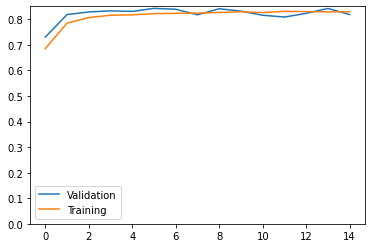

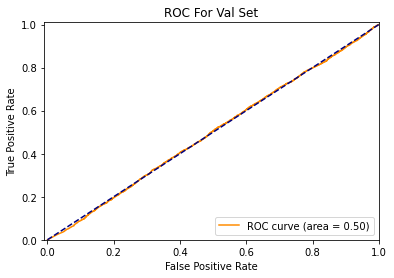

In [490]:
plt.plot(list_sample_size, list_f1)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation","Training"])

# Compute ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(Y_val, prob_test[:,1])

roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Val Set')
plt.legend(loc="lower right")